# **TASK 1 : Exploratory Data Analysis (EDA)**

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [3]:
# Exploratory Data Analysis (EDA)

# Data Description
print(customers.info())
print(products.describe())
print(transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


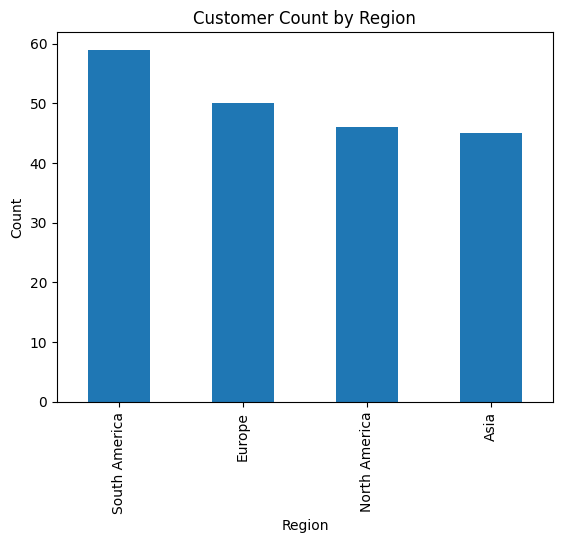

In [4]:
# Customer distribution by region
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Count by Region', xlabel='Region', ylabel='Count')
plt.show()

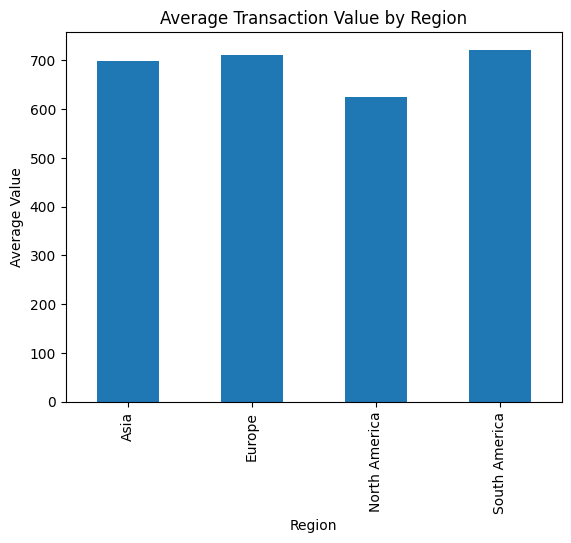

In [6]:
# Average transaction value per region
transactions_customers = transactions.merge(customers, on='CustomerID')
avg_transaction_value_by_region = transactions_customers.groupby('Region')['TotalValue'].mean()
avg_transaction_value_by_region.plot(kind='bar', title='Average Transaction Value by Region', xlabel='Region', ylabel='Average Value')
plt.show()

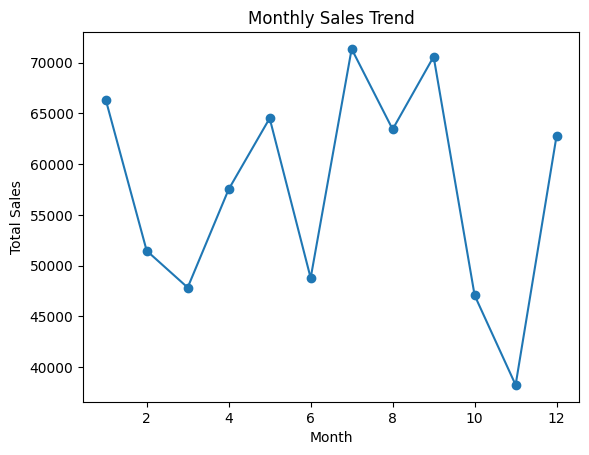

In [7]:
# Seasonality Trends (Sales by Month)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', xlabel='Month', ylabel='Total Sales')
plt.show()

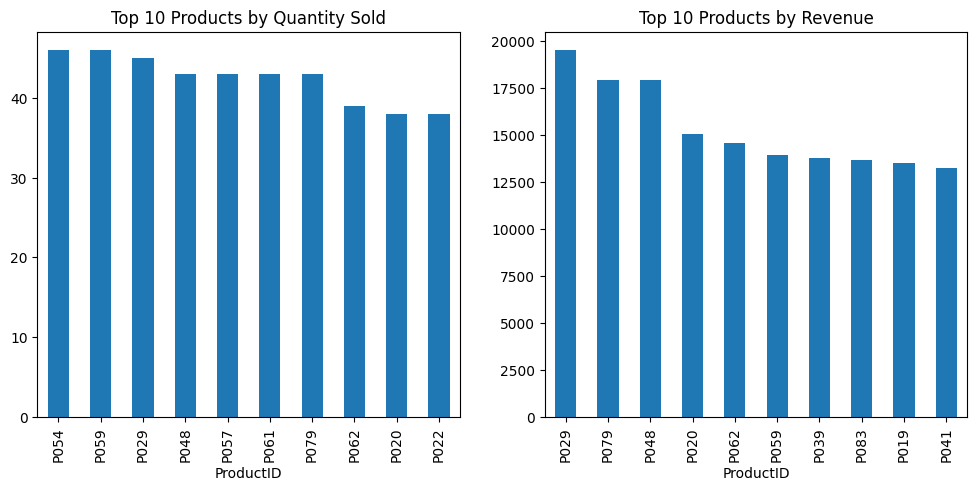

In [8]:
# Top-Selling Products by Quantity & Revenue
top_products_quantity = transactions_products.groupby('ProductID')['Quantity'].sum().nlargest(10)
top_products_revenue = transactions_products.groupby('ProductID')['TotalValue'].sum().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
top_products_quantity.plot(kind='bar', ax=axes[0], title='Top 10 Products by Quantity Sold')
top_products_revenue.plot(kind='bar', ax=axes[1], title='Top 10 Products by Revenue')
plt.show()